# *Project. Data Analysis and Modeling* <br>

## Goal
> #### EDA : Analysis of trends
> #### Modeling : Predicting 'Electric Range', 'Base MSRP'

# **Import Libraries & Read Dataset**

In [1]:
# For EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# For Modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [2]:
file_name = '/kaggle/input/electric-vehicle-population/Electric_Vehicle_Population_Data.csv'
data = pd.read_csv(file_name)

In [3]:
data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [5]:
data.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,177861.000000,177866.000000,177866.000000,177866.000000,177477.000000,1.778660e+05,1.778610e+05
mean,98172.453506,2020.515512,58.842162,1073.109363,29.127481,2.202313e+08,5.297672e+10
std,2442.450668,2.989384,91.981298,8358.624956,14.892169,7.584987e+07,1.578047e+09
min,1545.000000,1997.000000,0.000000,0.000000,1.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2019.000000,0.000000,0.000000,18.000000,1.814743e+08,5.303301e+10
50%,98122.000000,2022.000000,0.000000,0.000000,33.000000,2.282522e+08,5.303303e+10
75%,98370.000000,2023.000000,75.000000,0.000000,42.000000,2.548445e+08,5.305307e+10
max,99577.000000,2024.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.603300e+10


In [6]:
print('Number of types of \'Postal Code\' : ',data['Postal Code'].nunique())
print('Number of types of \'Legislative District\' : ', data['Legislative District'].nunique())
print('Number of types of \'2020 Census Tract\' : ',data['2020 Census Tract'].nunique())
print('Number of types of \'Electric Range\' : ',data['Electric Range'].nunique())
print('Number of types of \'Base MSRP\' : ',data['Base MSRP'].nunique())
print('Number of types of \'Electric Vehicle Type\' : ',data['Electric Vehicle Type'].nunique())
print('Number of types of \'Clean Alternative Fuel Vehicle (CAFV) Eligibility\' : ',data['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].nunique())
print('Number of types of \'Electric Utility\' : ',data['Electric Utility'].nunique())
print('Number of types of \'State\' : ',data['State'].nunique())

Number of types of 'Postal Code' :  862
Number of types of 'Legislative District' :  49
Number of types of '2020 Census Tract' :  2115
Number of types of 'Electric Range' :  102
Number of types of 'Base MSRP' :  31
Number of types of 'Electric Vehicle Type' :  2
Number of types of 'Clean Alternative Fuel Vehicle (CAFV) Eligibility' :  3
Number of types of 'Electric Utility' :  76
Number of types of 'State' :  46


### 'Electric Range' and 'Base MSPR' are used, but 'Postal Code' and '2020 Census Tract' are excluded from the EDA.
### (Because there are so many kinds)

In [7]:
data.isna().mean()

VIN (1-10)                                           0.000000
County                                               0.000028
City                                                 0.000028
State                                                0.000000
Postal Code                                          0.000028
Model Year                                           0.000000
Make                                                 0.000000
Model                                                0.000000
Electric Vehicle Type                                0.000000
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0.000000
Electric Range                                       0.000000
Base MSRP                                            0.000000
Legislative District                                 0.002187
DOL Vehicle ID                                       0.000000
Vehicle Location                                     0.000051
Electric Utility                                     0.000028
2020 Cen

# **Data Preprocessing**

### Replace with the previous value because the missing rate is very low.

In [8]:
data_pre = data.ffill()

In [9]:
data_pre.isna().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

In [10]:
data_pre = data_pre[data_pre['Base MSRP'] != 0]

In [11]:
# remove outlier

def remove(df, col):
    q_1 = df[col].quantile(0.25)
    q_3 = df[col].quantile(0.75)
    IQR = q_3 - q_1
    lower_bound = q_1 - 1.5*IQR
    upper_bound = q_3 + 1.5*IQR
    T = df[col].apply(lambda x: (x<lower_bound) | (x> upper_bound))
    return df[~T]

data_pre = remove(data_pre,'Electric Range')
data_pre = remove(data_pre, 'Base MSRP')                  

In [12]:
print(data.shape)
print(data_pre.shape)

(177866, 17)
(3333, 17)


#  *Data visualization*

> # Trend of Electric Vehicle Registration Count by Model Year

In [13]:
vehicle_counts = data_pre.groupby('Model Year')['DOL Vehicle ID'].count().reset_index(name='Number of Vehicles')
vehicle_counts 

,Model Year,Number of Vehicles
0,2008,20
1,2010,23
2,2011,7
3,2012,141
4,2013,730
5,2014,640
6,2016,391
7,2017,239
8,2018,650
9,2019,469


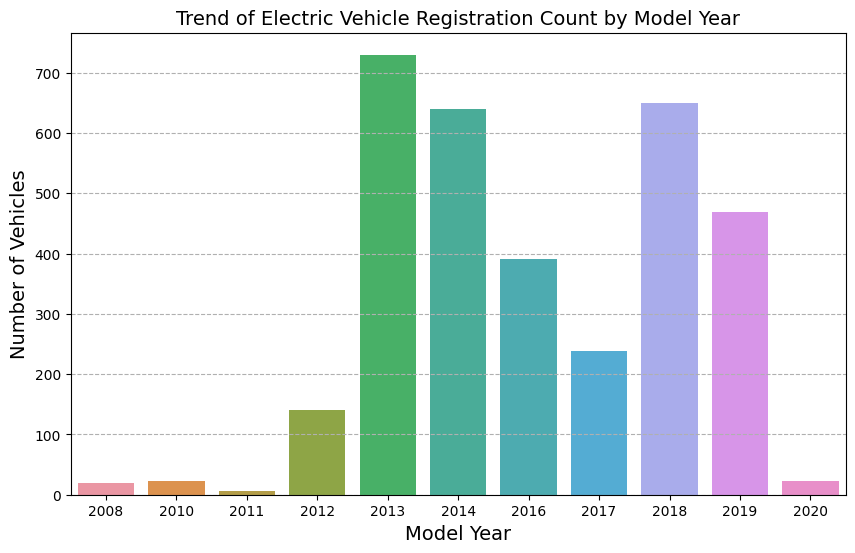

In [14]:
plt.figure(figsize=(10, 6)) 
sns.barplot(x='Model Year', y='Number of Vehicles', data = vehicle_counts) 
plt.title('Trend of Electric Vehicle Registration Count by Model Year', fontsize=14)
plt.xlabel('Model Year', fontsize=14) 
plt.ylabel('Number of Vehicles', fontsize=14) 
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--')

plt.show()

> # Trend of Base MSRP

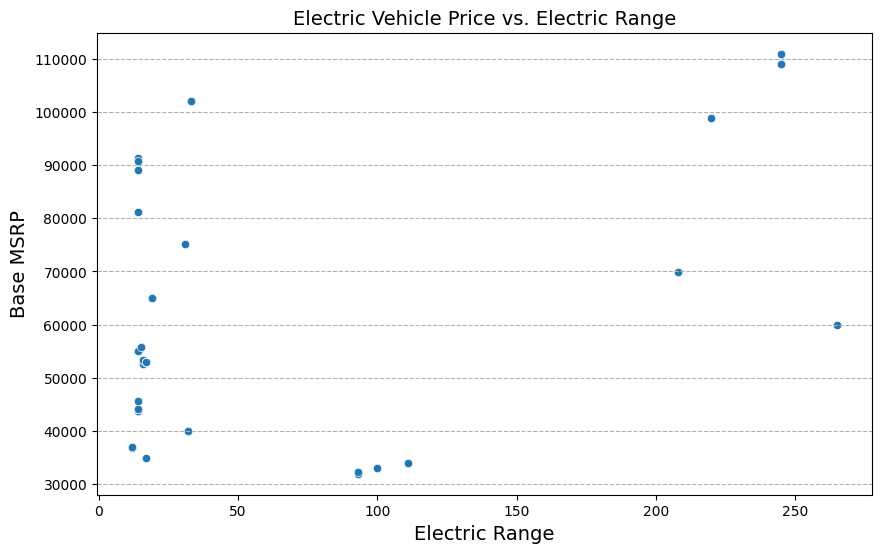

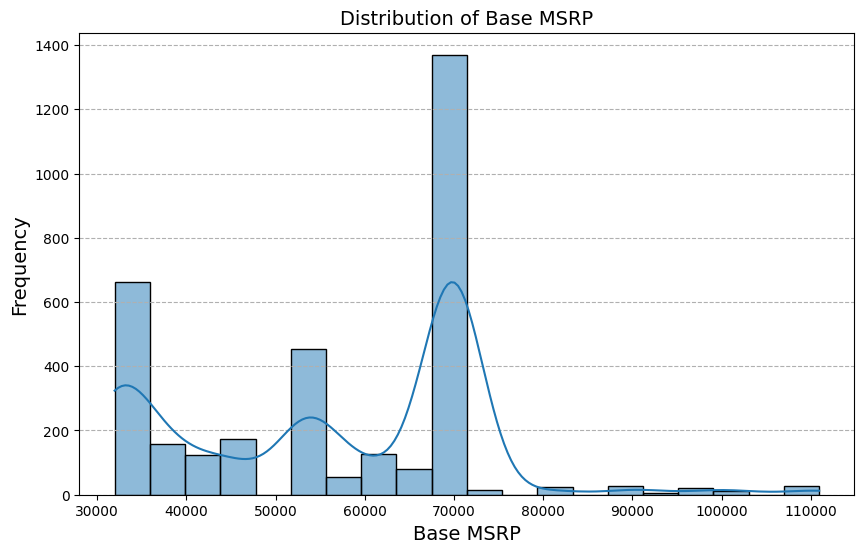

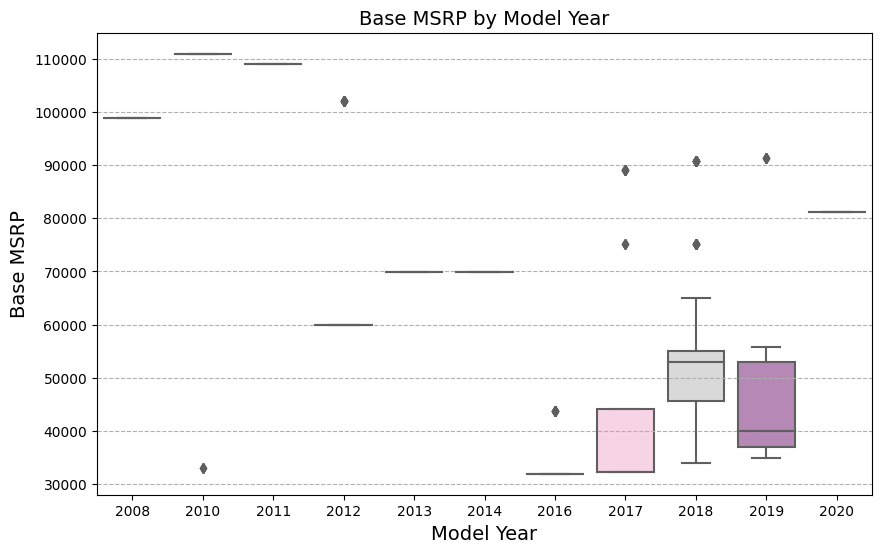

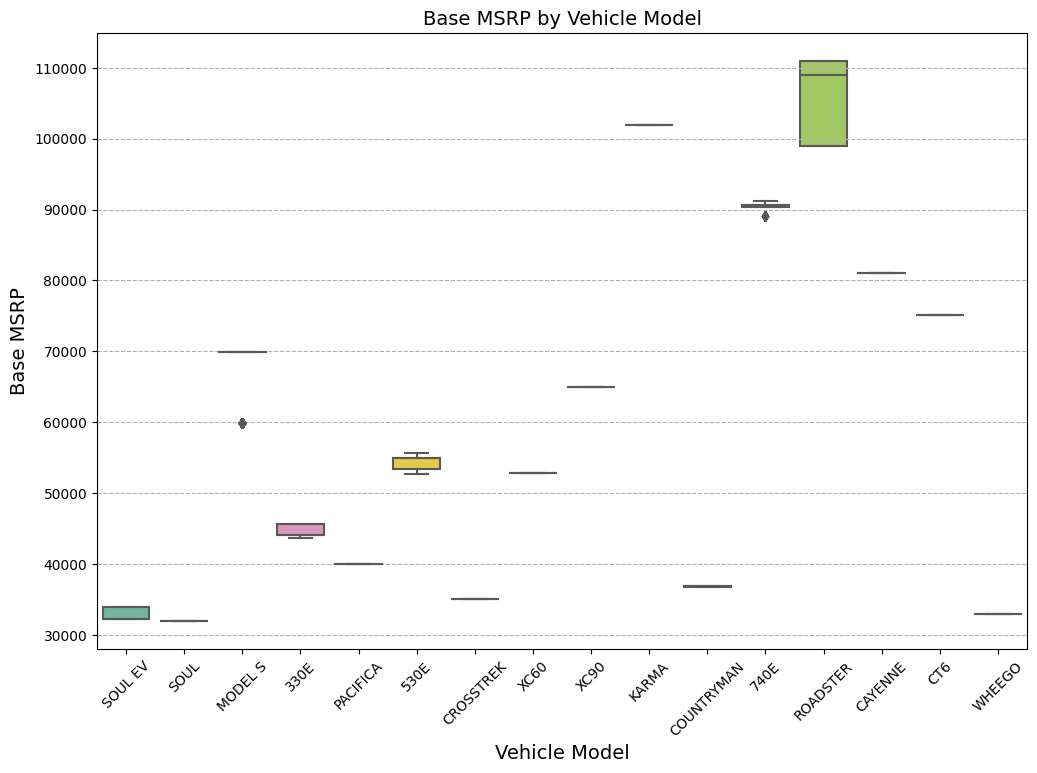

In [15]:
# Electric Vehicle Price vs. Electric Range
plt.figure(figsize=(10, 6)) 
sns.scatterplot(x='Electric Range', y='Base MSRP', data=data_pre) 
plt.title('Electric Vehicle Price vs. Electric Range', fontsize=14)
plt.xlabel('Electric Range', fontsize=14)
plt.ylabel('Base MSRP', fontsize=14)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--')
plt.show()

# Distribution of Base MSRP
plt.figure(figsize=(10, 6))
sns.histplot(data_pre['Base MSRP'], bins=20, kde=True)
plt.title('Distribution of Base MSRP', fontsize=14)
plt.xlabel('Base MSRP', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--')
plt.show()

# Base MSRP by Model Year
plt.figure(figsize=(10, 6))
sns.boxplot(x='Model Year', y='Base MSRP', data=data_pre, palette='Set3')
plt.title('Base MSRP by Model Year', fontsize=14)
plt.xlabel('Model Year', fontsize=14)
plt.ylabel('Base MSRP', fontsize=14)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--')
plt.show()

# Base MSRP by Vehicle Mode
plt.figure(figsize=(12, 8))
sns.boxplot(x='Model', y='Base MSRP', data=data_pre, palette='Set2')
plt.title('Base MSRP by Vehicle Model', fontsize=14)
plt.xlabel('Vehicle Model', fontsize=14)
plt.ylabel('Base MSRP', fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--')
plt.show()

> # Electric Vehicle Distribution by Legislative District

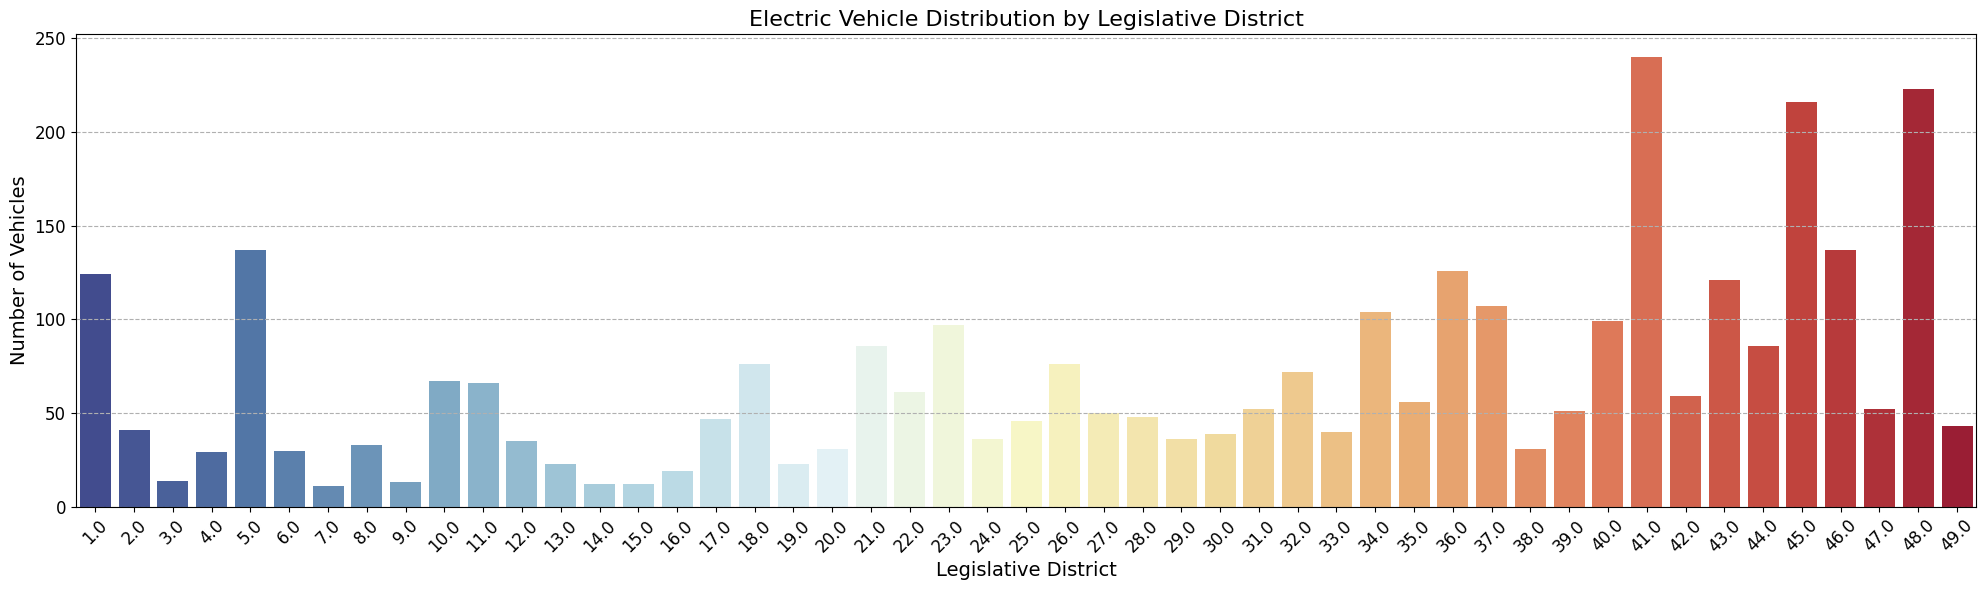

In [16]:
plt.figure(figsize=(20, 6))
sns.barplot(x=data_pre['Legislative District'].value_counts().index,
            y=data_pre['Legislative District'].value_counts(),
            palette='RdYlBu_r') 

plt.title('Electric Vehicle Distribution by Legislative District', fontsize=16)
plt.xlabel('Legislative District', fontsize=14)  
plt.ylabel('Number of Vehicles', fontsize=14)  
plt.xticks(rotation=45 , fontsize=12)  
plt.yticks(fontsize=12) 
plt.grid(axis='y', linestyle='--')  
plt.tight_layout()  
plt.show()

# *Data Analysis*

> # Top 10 Electric Vehicle Models

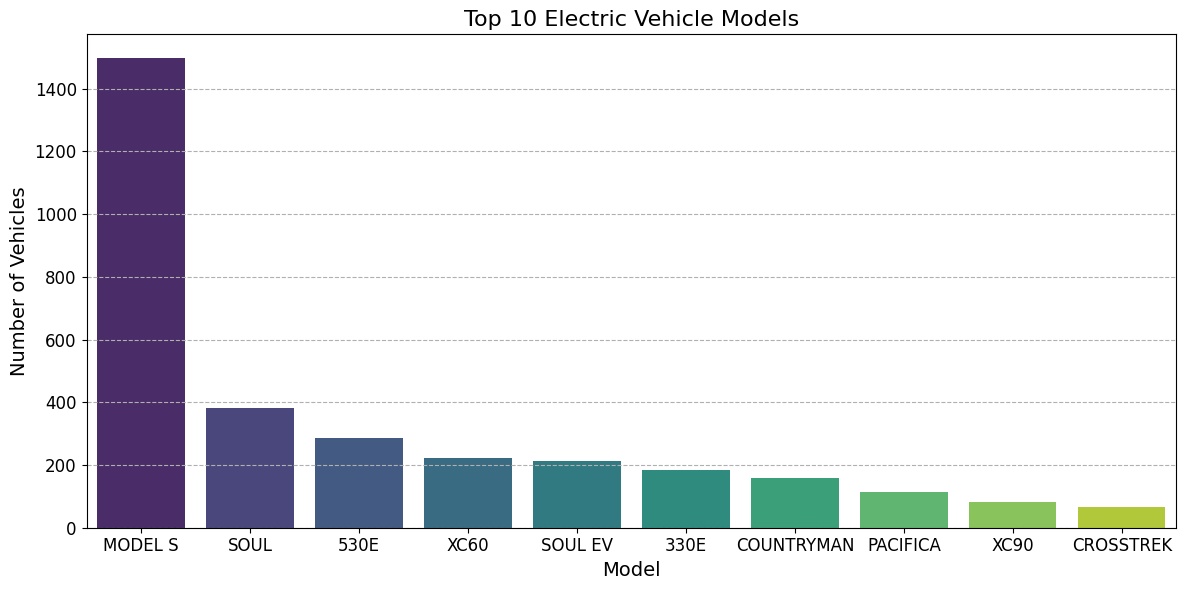

In [17]:
plt.figure(figsize=(12, 6))
top_models = data_pre['Model'].value_counts().head(10)  
sns.barplot(x=top_models.index, y=top_models.values, palette='viridis')  

plt.title('Top 10 Electric Vehicle Models', fontsize=16) 
plt.xlabel('Model', fontsize=14)  
plt.ylabel('Number of Vehicles', fontsize=14) 
plt.xticks(rotation=0, fontsize=12)  
plt.yticks(fontsize=12)  
plt.grid(axis='y', linestyle='--')  
plt.tight_layout()  
plt.show()

> # Changes in the number of Electric Vehicle Registrations by year

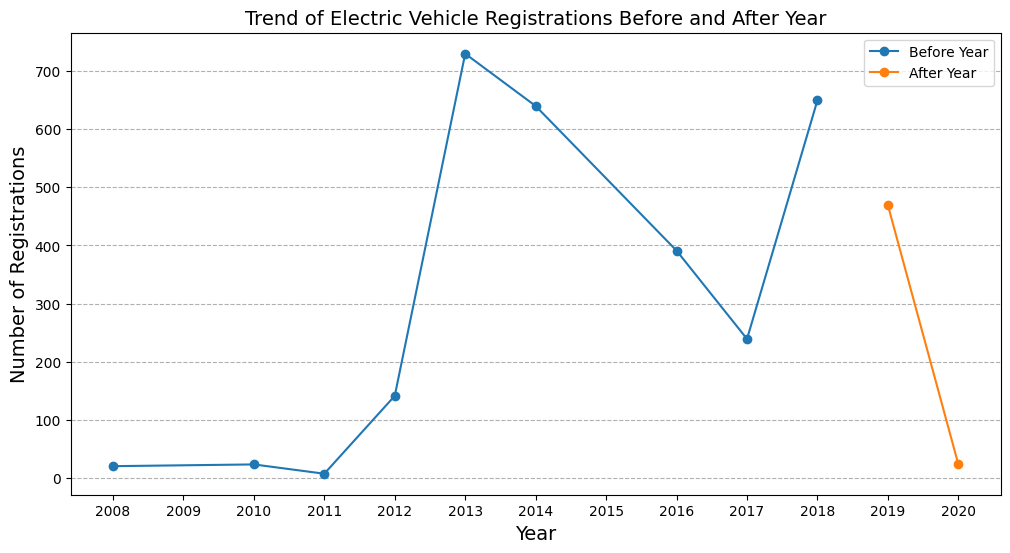

In [18]:
# Example Year
Example_start_year = 2019

pre_year = data_pre[data_pre['Model Year'] < Example_start_year]
post_year = data_pre[data_pre['Model Year'] >= Example_start_year]

# Changes in the number of Electric Vehicle Registrations by example year
plt.figure(figsize=(12, 6))
plt.plot(pre_year.groupby('Model Year').size(), label='Before Year', marker='o')
plt.plot(post_year.groupby('Model Year').size(), label='After Year', marker='o')
plt.title('Trend of Electric Vehicle Registrations Before and After Year', fontsize = 14)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Number of Registrations', fontsize = 14)
plt.xticks(range(data_pre['Model Year'].min(), data_pre['Model Year'].max() + 1), rotation=0)
plt.legend()
plt.grid(axis='y', linestyle='--')
plt.show()

# Modeling : Future 'Electric Range', 'Base MSPR' Forecast

# *Label Encoding & One-Hot Encoding*

In [19]:
label_encoder = LabelEncoder()
columns_to_encode = ['County', 'City','State' ,'Make', 'Model', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility']

for col in columns_to_encode:
    data_pre[col] = label_encoder.fit_transform(data_pre[col])

data_pre = pd.get_dummies(data_pre, columns=['Electric Vehicle Type'])

In [20]:
data_pre = data_pre.drop(['VIN (1-10)','Postal Code','Vehicle Location','Electric Utility','2020 Census Tract','DOL Vehicle ID'], axis=1)
data_pre.head()

,County,City,State,Model Year,Make,Model,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,Electric Vehicle Type_Battery Electric Vehicle (BEV),Electric Vehicle Type_Plug-in Hybrid Electric Vehicle (PHEV)
30,38,145,8,2017,4,12,0,93,32250,22.0,True,False
71,34,58,8,2016,4,11,0,93,31950,32.0,True,False
187,45,240,8,2013,8,8,0,208,69900,14.0,True,False
218,18,163,8,2013,8,8,0,208,69900,26.0,True,False
293,17,215,8,2017,0,0,1,14,44100,11.0,False,True


In [21]:
data_pre.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3333 entries, 30 to 177739
Data columns (total 12 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   County                                                        3333 non-null   int64  
 1   City                                                          3333 non-null   int64  
 2   State                                                         3333 non-null   int64  
 3   Model Year                                                    3333 non-null   int64  
 4   Make                                                          3333 non-null   int64  
 5   Model                                                         3333 non-null   int64  
 6   Clean Alternative Fuel Vehicle (CAFV) Eligibility             3333 non-null   int64  
 7   Electric Range                                                3333 non-

In [22]:
# Split into training and test sets (Electric Range)

X_train_E, X_test_E, y_train_E, y_test_E = train_test_split(data_pre.drop('Electric Range', axis=1),
data_pre['Electric Range'], test_size=0.2, random_state=100)

In [23]:
# Split into training and test sets (Base MSRP)

X_train_B, X_test_B, y_train_B, y_test_B = train_test_split(data_pre.drop('Base MSRP', axis=1),
data_pre['Base MSRP'], test_size=0.2, random_state=100)

> # Linear Regression : Electric Range

### *Modeling*

In [24]:
model_LR = LinearRegression()
model_LR.fit(X_train_E,y_train_E)

LinearRegression()

### *evaluation*

In [25]:
pred_LR = model_LR.predict(X_test_E)
RMSE_L  = mean_squared_error(y_test_E, pred_LR) ** 0.5
R2_L = r2_score(y_test_E, pred_LR)

print("RMSE :",round(RMSE_L,5))
print("R2 :",round(R2_L,5))

RMSE : 17.01804
R2 : 0.96327


> # Linear Regression : Base MSRP

### *Modeling*

In [26]:
model_LR2 = LinearRegression()
model_LR2.fit(X_train_B,y_train_B)

LinearRegression()

### *evaluation*

In [27]:
pred_LR2 = model_LR2.predict(X_test_B)
RMSE_L2  = mean_squared_error(y_test_B, pred_LR2) ** 0.5
R2_L2 = r2_score(y_test_B, pred_LR2)

print("RMSE :",round(RMSE_L2,5))
print("R2 :",round(R2_L2,5))

RMSE : 9737.60925
R2 : 0.67178


> # Random Forest : Electric Range

### *Modeling*

In [28]:
model_RF = RandomForestRegressor(random_state=100)
model_RF.fit(X_train_E,y_train_E)

RandomForestRegressor(random_state=100)

### *evaluation*

In [29]:
train_pred = model_RF.predict(X_train_E)
test_pred = model_RF.predict(X_test_E)
Train_RMSE = mean_squared_error(y_train_E, train_pred) ** 0.5
Test_RMSE = mean_squared_error(y_test_E, test_pred) ** 0.5

print("Train_RMSE :",round(Train_RMSE,2))
print("Test_RMSE :",round(Test_RMSE,2))

Train_RMSE : 1.05
Test_RMSE : 2.85


> # Random Forest : Base MSRP

### *Modeling*

In [30]:
model_RF2 = RandomForestRegressor(random_state=100)
model_RF2.fit(X_train_B,y_train_B)

RandomForestRegressor(random_state=100)

### *evaluation*

In [31]:
train_pred2 = model_RF2.predict(X_train_B)
test_pred2 = model_RF2.predict(X_test_B)
Train_RMSE2 = mean_squared_error(y_train_B, train_pred2) ** 0.5
Test_RMSE2 = mean_squared_error(y_test_B, test_pred2) ** 0.5

print("Train_RMSE :",round(Train_RMSE2,2))
print("Test_RMSE :",round(Test_RMSE2,2))

Train_RMSE : 528.63
Test_RMSE : 1607.44


> # XGBoost : Electric Range

### *Modeling*

In [32]:
model_XGB = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)

model_XGB.fit(X_train_E, y_train_E)

XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, ...)

### *evaluation*

In [33]:
pred_XGB = model_XGB.predict(X_test_E)

RMSE_XGB = mean_squared_error(y_test_E, pred_XGB) ** 0.5
R2_XGB = r2_score(y_test_E, pred_XGB)

print("RMSE :",round(RMSE_XGB,5))
print("R2 :",round(R2_XGB,5))

RMSE : 0.70352
R2 : 0.99994


### *Grid Search*

In [34]:
param_grid = {
    'learning_rate':[0.01,0.1,0.3],
    'max_depth':[5,7,10],         
    'subsample':[0.5,0.7,1],
    'n_estimators':[300,500,1000]
}
                    
score = make_scorer(mean_squared_error, greater_is_better=False)
grid_search = GridSearchCV(estimator=model_XGB, param_grid=param_grid, scoring=score, cv=5)
grid_search.fit(X_train_E, y_train_E)

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 1000, 'subsample': 0.7}


In [35]:
best_model_XGB = grid_search.best_estimator_
best_pred_XGB = best_model_XGB.predict(X_test_E)

RMSE_R = mean_squared_error(y_test_E,best_pred_XGB) ** 0.5
R2_R = r2_score(y_test_E,best_pred_XGB)

print("RMSE :",round(RMSE_R,5))
print("R2 :",round(R2_R,5))

RMSE : 0.5105
R2 : 0.99997


> # XGBoost : Base MSRP

### *Modeling*

In [36]:
model_XGB2 = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)

model_XGB2.fit(X_train_B, y_train_B)

XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, ...)

### *evaluation*

In [37]:
pred_XGB2 = model_XGB2.predict(X_test_B)

RMSE_XGB2 = mean_squared_error(y_test_B, pred_XGB2) ** 0.5
R2_XGB2 = r2_score(y_test_B, pred_XGB2)

print("RMSE :",round(RMSE_XGB2,5))
print("R2 :",round(R2_XGB2,5))

RMSE : 750.68909
R2 : 0.99805


### *Grid Search*

In [38]:
grid_search2 = GridSearchCV(estimator=model_XGB2, param_grid=param_grid, scoring=score, cv=5)
grid_search2.fit(X_train_B, y_train_B)

print("Best Parameters:", grid_search2.best_params_)

Best Parameters: {'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 1000, 'subsample': 0.7}


In [39]:
best_model_XGB2 = grid_search2.best_estimator_
best_pred_XGB2 = best_model_XGB2.predict(X_test_B)

RMSE_R2 = mean_squared_error(y_test_B,best_pred_XGB2) ** 0.5
R2_R2 = r2_score(y_test_B,best_pred_XGB2)

print("RMSE :",round(RMSE_R2,5))
print("R2 :",round(R2_R2,5))

RMSE : 535.66758
R2 : 0.99901


> # LightGBM : Electric Range

### *Modeling*

In [40]:
model_LGB = lgb.LGBMRegressor(verbose=0)
model_LGB.fit(X_train_E, y_train_E)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMRegressor(verbose=0)

### *evaluation*

In [41]:
pred_LGB = model_LGB.predict(X_test_E)
RMSE_LGB = mean_squared_error(y_test_E,pred_LGB) ** 0.5
R2_LGB = r2_score(y_test_E,pred_LGB)

print("RMSE :",round(RMSE_LGB,5))
print("R2 :",round(R2_LGB,5))

RMSE : 7.68235
R2 : 0.99251


> # LightGBM : Base MSRP

### *Modeling*

In [42]:
model_LGB2 = lgb.LGBMRegressor(verbose=0)
model_LGB2.fit(X_train_B, y_train_B)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines


LGBMRegressor(verbose=0)

### *evaluation*

In [43]:
pred_LGB2 = model_LGB2.predict(X_test_B)
RMSE_LGB2 = mean_squared_error(y_test_B,pred_LGB2) ** 0.5
R2_LGB2 = r2_score(y_test_B,pred_LGB2)

print("RMSE :",round(RMSE_LGB2,5))
print("R2 :",round(R2_LGB2,5))

RMSE : 4004.0278
R2 : 0.9445


# Modeling Conclusion

> ## Electric Range

In [44]:
print('Linear Regression')
print("RMSE :",round(RMSE_L,5))
print("R2 :",round(R2_L,5))
print('-'*20)
print('Random Forest')
print("Train_RMSE :",round(Train_RMSE,5))
print("Test_RMSE :",round(Test_RMSE,5))
print('-'*20)
print('XGBoost')
print("RMSE :",round(RMSE_XGB,5))
print("R2 :",round(R2_XGB,5))
print('-'*20)
print('Best_XGBoost')
print("RMSE :",round(RMSE_R,5))
print("R2 :",round(R2_R,5))
print('-'*20)
print('LightGBM')
print("RMSE :",round(RMSE_LGB,5))
print("R2 :",round(R2_LGB,5))

Linear Regression
RMSE : 17.01804
R2 : 0.96327
--------------------
Random Forest
Train_RMSE : 1.05347
Test_RMSE : 2.8502
--------------------
XGBoost
RMSE : 0.70352
R2 : 0.99994
--------------------
Best_XGBoost
RMSE : 0.5105
R2 : 0.99997
--------------------
LightGBM
RMSE : 7.68235
R2 : 0.99251


> ## Base MSRP

In [45]:
print('Linear Regression')
print("RMSE :",round(RMSE_L2,5))
print("R2 :",round(R2_L2,5))
print('-'*20)
print('Random Forest')
print("Train_RMSE :",round(Train_RMSE2,5))
print("Test_RMSE :",round(Test_RMSE2,5))
print('-'*20)
print('XGBoost')
print("RMSE :",round(RMSE_XGB2,5))
print("R2 :",round(R2_XGB2,5))
print('-'*20)
print('Best_XGBoost')
print("RMSE :",round(RMSE_R2,5))
print("R2 :",round(R2_R2,5))
print('-'*20)
print('LightGBM')
print("RMSE :",round(RMSE_LGB2,5))
print("R2 :",round(R2_LGB2,5))

Linear Regression
RMSE : 9737.60925
R2 : 0.67178
--------------------
Random Forest
Train_RMSE : 528.62992
Test_RMSE : 1607.43923
--------------------
XGBoost
RMSE : 750.68909
R2 : 0.99805
--------------------
Best_XGBoost
RMSE : 535.66758
R2 : 0.99901
--------------------
LightGBM
RMSE : 4004.0278
R2 : 0.9445


# Thanks